# Chapter2 PyTorchの基本
## 5. 最適化関数

In [1]:
# 必要なパッケージのインストール
!pip3 install torch==1.6.0+cu101
!pip3 install torchvision==0.7.0+cu101
!pip3 install numpy==1.18.5
!pip3 install matplotlib==3.2.2
!pip3 install scikit-learn==0.23.1
!pip3 install seaborn==0.11.0

     |████████████████████████████████| 6.9MB 2.7MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
# 必要なパッケージのインストール
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
import matplotlib.pyplot as plt

In [3]:
# パッケージのインポート
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
import matplotlib.pyplot as plt

# ニューラルネットワークの定義
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        return x


# ハイパーパラメータの定義
N = 64  # バッチサイズ: 64
D_in = 1000  # 入力次元: 1000
H = 100  # 隠れ層次元: 100
D_out = 10  # 出力次元: 10
epoch = 100 # 学習回数

# データの生成
x = torch.rand(N, D_in)  # 入力データ
y = torch.rand(N, D_out)  # 正解値

# ネットワークのロード
net = Net(D_in, H, D_out)

# 損失関数
criterion = nn.MSELoss()

# 最適化関数
optimizer = optim.Adam(net.parameters(), lr=1e-4, betas=(0.9, 0.99), eps=1e-07)

loss_list = []  # 学習ごとの誤差を格納するリスト
# 学習
for i in range(epoch):
    # データを入力して予測値を計算（順伝播）
    y_pred = net(x)
    # 損失（誤差）を計算
    loss = criterion(y_pred, y)
    print("Epoch: {}, Loss: {:.3f}".format(i+1, loss.item()))  # 誤差を表示
    loss_list.append(loss.item())  # 誤差をリスト化して記録

    # 勾配の初期化
    optimizer.zero_grad()
    # 勾配の計算（逆伝搬）
    loss.backward()
    # パラメータ（重み）の更新
    optimizer.step()

Epoch: 1, Loss: 0.386
Epoch: 2, Loss: 0.346
Epoch: 3, Loss: 0.310
Epoch: 4, Loss: 0.278
Epoch: 5, Loss: 0.249
Epoch: 6, Loss: 0.223
Epoch: 7, Loss: 0.200
Epoch: 8, Loss: 0.180
Epoch: 9, Loss: 0.162
Epoch: 10, Loss: 0.148
Epoch: 11, Loss: 0.135
Epoch: 12, Loss: 0.125
Epoch: 13, Loss: 0.117
Epoch: 14, Loss: 0.111
Epoch: 15, Loss: 0.106
Epoch: 16, Loss: 0.102
Epoch: 17, Loss: 0.098
Epoch: 18, Loss: 0.096
Epoch: 19, Loss: 0.094
Epoch: 20, Loss: 0.092
Epoch: 21, Loss: 0.091
Epoch: 22, Loss: 0.089
Epoch: 23, Loss: 0.089
Epoch: 24, Loss: 0.088
Epoch: 25, Loss: 0.087
Epoch: 26, Loss: 0.087
Epoch: 27, Loss: 0.087
Epoch: 28, Loss: 0.086
Epoch: 29, Loss: 0.086
Epoch: 30, Loss: 0.086
Epoch: 31, Loss: 0.085
Epoch: 32, Loss: 0.085
Epoch: 33, Loss: 0.084
Epoch: 34, Loss: 0.084
Epoch: 35, Loss: 0.083
Epoch: 36, Loss: 0.083
Epoch: 37, Loss: 0.082
Epoch: 38, Loss: 0.081
Epoch: 39, Loss: 0.081
Epoch: 40, Loss: 0.080
Epoch: 41, Loss: 0.079
Epoch: 42, Loss: 0.079
Epoch: 43, Loss: 0.078
Epoch: 44, Loss: 0.0

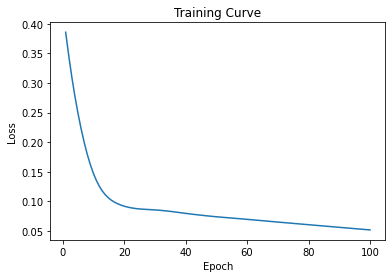

In [4]:
# 結果を図示
plt.figure()
plt.title('Training Curve')  # タイトル
plt.xlabel('Epoch')  # x軸のラベル
plt.ylabel('Loss')  # y軸のラベル
plt.plot(range(1, epoch+1), loss_list)  # 学習回数ごとの誤差をプロット
plt.show()  # プロットの表示